# Intro
Чаще всего для тепичных задачь в DL уже есть готовые решения и библиотеки, которые значительно ускоряют решение задачи.

Немного погуглив в инете я нашел множество решений с уже предобучеными моделями со своими обертками и готовыми пеплайнами.
например:

* [https://github.com/amaiya/ktrain](https://github.com/amaiya/ktrain)

А поскольку мы работаем в Keras, я взял в работу библиотеку ktrain. Посмотрим что получилось...

In [1]:
!pip show keras

Name: Keras
Version: 2.2.4
Summary: Deep Learning for humans
Home-page: https://github.com/keras-team/keras
Author: Francois Chollet
Author-email: francois.chollet@gmail.com
License: MIT
Location: /opt/conda/lib/python3.6/site-packages
Requires: keras-preprocessing, six, pyyaml, scipy, numpy, keras-applications, h5py
Required-by: keras-tqdm, ethnicolr


In [2]:
!git clone https://github.com/amaiya/ktrain/

Cloning into 'ktrain'...
remote: Enumerating objects: 580, done.
remote: Counting objects: 100% (580/580), done.
remote: Compressing objects: 100% (256/256), done.
remote: Total 1010 (delta 366), reused 514 (delta 314), pack-reused 430
Receiving objects: 100% (1010/1010), 5.75 MiB | 2.51 MiB/s, done.
Resolving deltas: 100% (603/603), done.


In [3]:
!ls

__notebook_source__.ipynb  ktrain


In [4]:
!pip install ./ktrain

Processing ./ktrain
  Created wheel for ktrain: filename=ktrain-0.3.1-cp36-none-any.whl size=79711 sha256=aef8fdd557586c43b0ceba4d2ab264980fb7ea95389b898550435b74689e9481
  Stored in directory: /tmp/pip-ephem-wheel-cache-87o949ls/wheels/ee/a1/6b/a8e54214ac3b99724472da2db39fa686df8faed1c49d705ba6
  Created wheel for keras-bert: filename=keras_bert-0.78.0-cp36-none-any.whl size=37882 sha256=989bb53a7818fbe644f9283be8b9fcbbb207c138b33b3d0d8f71fb1570138cff
  Stored in directory: /tmp/.cache/pip/wheels/9f/2a/a3/a4741e16520a3d651bf895e5fba34d886a993efdbb303ffc11
  Created wheel for seqeval: filename=seqeval-0.0.12-cp36-none-any.whl size=7423 sha256=807c65d0254c6e742d6322503a3d829de0fefe48a81c5958c83d3a6c78a04f23
  Stored in directory: /tmp/.cache/pip/wheels/4f/32/0a/df3b340a82583566975377d65e724895b3fad101a3fb729f68
  Created wheel for keras-transformer: filename=keras_transformer-0.30.0-cp36-none-any.whl size=13388 sha256=42755d92d3acd54fe0bb410fdee2e632276f2f6a556dc33dd73df924c9d8ac3c
  St

  Created wheel for keras-layer-normalization: filename=keras_layer_normalization-0.13.0-cp36-none-any.whl size=5209 sha256=ba64572cd69cafb4755d2d55fbbe55a1f54a6c6de4185fea4b6c5238415f5398
  Stored in directory: /tmp/.cache/pip/wheels/50/2b/71/d1d06f71d78c46a9912dc89a5bb46f357cf64fa05883fadc64
  Created wheel for keras-position-wise-feed-forward: filename=keras_position_wise_feed_forward-0.6.0-cp36-none-any.whl size=5623 sha256=fd44bf12c83db596cc6690116515a9ae54279e2febc4f6035b445e72e5405cfc
  Stored in directory: /tmp/.cache/pip/wheels/39/e2/e2/3514fef126a00574b13bc0b9e23891800158df3a3c19c96e3b
  Created wheel for keras-embed-sim: filename=keras_embed_sim-0.7.0-cp36-none-any.whl size=4677 sha256=905ac5d4cd18647dc75280338ba2150bfd2e0c56d271753e5637fd67915ad0e2
  Stored in directory: /tmp/.cache/pip/wheels/d1/bc/b1/b0c45cee4ca2e6c86586b0218ffafe7f0703c6d07fdf049866
  Created wheel for keras-self-attention: filename=keras_self_attention-0.41.0-cp36-none-any.whl size=17289 sha256=a71b1e2e

In [5]:
#!pip install ktrain

In [6]:
!pip freeze > requirements.txt

In [7]:
import ktrain
from ktrain import text

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:
import random
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# plt
import matplotlib.pyplot as plt
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# SETUP
В setup выносим основные настройки

In [10]:
# MODEL
BATCH_SIZE  = 32
EPOCH       = 10
VAL_SPLIT   = 0.15  #15%

# TOKENIZER
# The maximum number of words to be used. (most frequent)
MAX_WORDS = 10000
# Max number of words in each complaint.
MAXLEN    = 100

DATA_PATH = '/kaggle/input/sf-dl-movie-genre-classification/'
PATH      = '/kaggle/working/'

# Data
#### TRAIN

In [11]:
train_df = pd.read_csv(DATA_PATH+'train_data.txt',  sep=':::', header=None, 
                       names=('name', 'genre', 'text'), index_col=0, engine='python')

In [12]:
# fix bug
train_df.genre = train_df.genre.str.strip()

In [13]:
train_df.head()

,name,genre,text
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
name     54214 non-null object
genre    54214 non-null object
text     54214 non-null object
dtypes: object(3)
memory usage: 1.7+ MB


Text(0, 0.5, 'Counts')

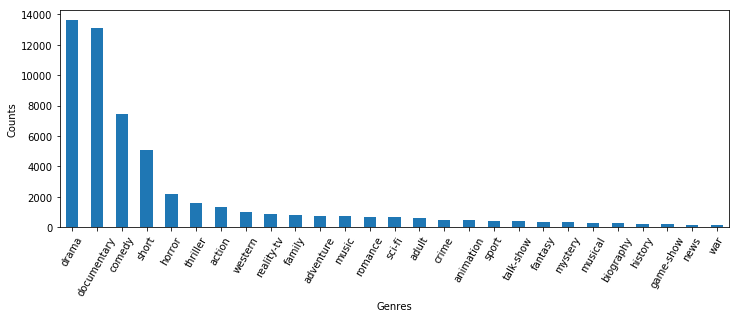

In [15]:
train_df.genre.value_counts().plot(kind='bar',figsize=(12,4),fontsize=10)
plt.xticks(rotation=60)
plt.xlabel("Genres",fontsize=10)
plt.ylabel("Counts",fontsize=10)

In [16]:
train_df['text_name'] = train_df.name + ' ' + train_df.text
train_df.head()

,name,genre,text,text_name
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,Oscar et la dame rose (2009) Listening in t...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,Cupid (1997) A brother and sister with a pa...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,"Young, Wild and Wonderful (1980) As the bus..."
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,The Secret Sin (1915) To help their unemplo...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,The Unrecovered (2007) The film's title ref...


In [17]:
train = train_df[['genre', 'text']]
train = pd.get_dummies(train, prefix='', prefix_sep='', columns=['genre',])
Y = pd.get_dummies(train_df.genre)
classes =  Y.columns
train.to_csv('train.csv', index=False)
train.head()

,text,action,adult,adventure,animation,biography,comedy,crime,documentary,drama,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
1,Listening in to a conversation between his do...,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,A brother and sister with a past incestuous r...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,As the bus empties the students for their fie...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,To help their unemployed father make ends mee...,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,The film's title refers not only to the un-re...,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
classes

Index(['action', 'adult', 'adventure', 'animation', 'biography', 'comedy',
       'crime', 'documentary', 'drama', 'family', 'fantasy', 'game-show',
       'history', 'horror', 'music', 'musical', 'mystery', 'news',
       'reality-tv', 'romance', 'sci-fi', 'short', 'sport', 'talk-show',
       'thriller', 'war', 'western'],
      dtype='object')

In [ ]:
classes =  list(set(train_df.genre))

### TEST

In [ ]:
test_df = pd.read_csv(DATA_PATH+'test_data.txt',  sep=':::', header=None, 
                      names=('name', 'text'), index_col=0, engine='python')
test_df.head()

# ktrain power
Далее Основываясь на примерах:
* [https://github.com/amaiya/ktrain/blob/master/tutorial-04-text-classification.ipynb](https://github.com/amaiya/ktrain/blob/master/tutorial-04-text-classification.ipynb)
* [https://github.com/amaiya/ktrain/blob/master/examples/text/IMDb-BERT.ipynb](https://github.com/amaiya/ktrain/blob/master/examples/text/IMDb-BERT.ipynb)
* [https://github.com/amaiya/ktrain/blob/master/examples/text/toxic_comments-bigru.ipynb](https://github.com/amaiya/ktrain/blob/master/examples/text/toxic_comments-bigru.ipynb)
* и исходниках

строим свое решение

In [19]:
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_csv(PATH+'train.csv',
                      'text',                                       
                      label_columns = classes,
                      val_filepath=None, # if None, 10% of data will be used for validation
                      max_features=MAX_WORDS, maxlen=MAXLEN,
                      ngram_range=1)

Word Counts: 130820
Nrows: 48792
48792 train sequences
Average train sequence length: 93
x_train shape: (48792,100)
y_train shape: (48792,27)
5422 test sequences
Average test sequence length: 92
x_test shape: (5422,100)
y_test shape: (5422,27)


In [ ]:
#Y = pd.get_dummies(train_df.genre)
#CLASS_NUM = Y.shape[1]
#print('Shape of label tensor:', Y.shape)

In [ ]:
#(x_train, y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=train_df.text.values, 
#                                                                      y_train=Y, 
#                                                                      val_pct=VAL_SPLIT, 
#                                                                      max_features=MAX_WORDS, 
#                                                                      maxlen=MAXLEN,
#                                                                      preprocess_mode='bert',
#                                                                      ngram_range=1)

In [20]:
y_train.shape

(48792, 27)

In [21]:
x_train

array([[   0,    0,    0, ..., 2865,   19, 5927],
       [   0,    0,    0, ...,    4,    1,  121],
       [   0,    0,    0, ...,   23, 1355, 1522],
       ...,
       [   0,    0,    0, ...,  963, 3211, 2045],
       [   0,    0,    0, ..., 3918,  636, 3042],
       [   1, 2477, 2390, ...,   61,   25,  203]], dtype=int32)

In [22]:
model = text.text_classifier('bert', (x_train, y_train), preproc=preproc, )

Is Multi-Label? False
compiling word ID features...
maxlen is 100
downloading pretrained BERT model and vocabulary...
[██████████████████████████████████████████████████]
extracting pretrained BERT model and vocabulary...
done.

cleanup downloaded zip...
done.

done.


In [25]:
#model = text.text_classifier('bert', (x_train, y_train), preproc=preproc, multilabel=True)

Is Multi-Label? True
compiling word ID features...
maxlen is 100
done.


In [26]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test))

In [27]:
learner.lr_find()
learner.lr_plot()

simulating training for different learning rates... this may take a few moments...


ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 2 array(s), but instead got the following list of 1 arrays: [array([[   0,    0,    0, ..., 2865,   19, 5927],
       [   0,    0,    0, ...,    4,    1,  121],
       [   0,    0,    0, ...,   23, 1355, 1522],
       ...,
       [   0,    0,    0, ...,  963, ...

In [ ]:
learner.autofit(2e-5, 5)

In [ ]:
# на соревнованиях всегда сохраняйте predict_proba, чтоб потом можно было построить ансамбль решений
predict_proba = pd.DataFrame(predict_proba, columns=Y.columns)
predict_proba.to_csv('predict_proba.csv', index=False)
predict_proba.head()

In [ ]:
predict_genre = Y.columns[np.argmax(predict_proba.values, axis=1)]

In [ ]:
submission = pd.DataFrame({'id':range(1, len(predict_genre)+1), 
                           'genre':predict_genre.str.strip()}, 
                          columns=['id', 'genre'])

submission.to_csv('submission.csv', index=False)
submission.head()